<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [309]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [310]:
filepath='./sat_scores.csv'
data=''
with open(filepath, 'r') as f:
    data = f.read().splitlines()
f.close()

clean1=[]
for i in data:
    clean1.append(i.split(',')) # Comma-separated values
header=(clean1[0])
data=(clean1[1:])

clean2={key: [row[index] for row in data]for index, key in enumerate(header) }

In [311]:
print(clean2)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

# 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

Answer: The first method of converting a dictionary to data frame cause all the variables to be string. We would have to convert the variable type. As for the second method of reading directly from csv using pandas have correctly indentified numeric values as integers.

In [312]:
#method 1: Make a pandas DataFrame object with the SAT dictionary
scores1=pd.DataFrame(clean2)
print(scores1.dtypes)
scores1.head()

Math      object
Rate      object
State     object
Verbal    object
dtype: object


,Math,Rate,State,Verbal
0,510,82,CT,509
1,513,81,NJ,499
2,515,79,MA,511
3,505,77,NY,495
4,516,72,NH,520


In [313]:
#method 2: Use pandas .read_csv() function
filepath='./sat_scores.csv'
scores2=pd.read_csv(filepath)
print(scores2.dtypes)
scores2.head()

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [314]:
#Test
#Convert string column values to float in the dictionary first before converting it to a data frame:
clean3={keys:[float(x) if x.isdigit() else x for x in items ] for keys, items in clean2.items()}
scores3=pd.DataFrame(clean3)
print(scores3.dtypes)
scores3.head()

Math      float64
Rate      float64
State      object
Verbal    float64
dtype: object


,Math,Rate,State,Verbal
0,510.0,82.0,CT,509.0
1,513.0,81.0,NJ,499.0
2,515.0,79.0,MA,511.0
3,505.0,77.0,NY,495.0
4,516.0,72.0,NH,520.0


### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [315]:
scores2.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


Description of the columns:
<br>
State: First 2 letter code of the country state
<br>
Rate: Participation Rate in the country
<br>
Verbal: Mean verbal score 
<br>
Math: Mean Math score 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [316]:
scores2.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [317]:
scores2.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [318]:
datadict = { 'State': {'Type':'STRING',
                       'Description':'First 2 letter code of the country state'},
             'Rate' : {'Type':'INTEGER',
                       'Description':'Participation Rate in the country'},
             'Verbal': {'Type':'INTEGER',
                       'Description':'Mean verbal score'},
             'Math' :  {'Type':'INTEGER',
                       'Description':'Mean Math score'},
             'Shape' : {scores2.shape}
                      }


pprint(datadict)

{'Math': {'Description': 'Mean Math score', 'Type': 'INTEGER'},
 'Rate': {'Description': 'Participation Rate in the country',
          'Type': 'INTEGER'},
 'Shape': {(52, 4)},
 'State': {'Description': 'First 2 letter code of the country state',
           'Type': 'STRING'},
 'Verbal': {'Description': 'Mean verbal score', 'Type': 'INTEGER'}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [319]:
# for all charts: 
# 1) Label your plots (xaxis, yaxis, title, legend, ticklabels if applicable)
# 2) Aesthetics: Fontsize, figsize, colors, xlim, ylim 

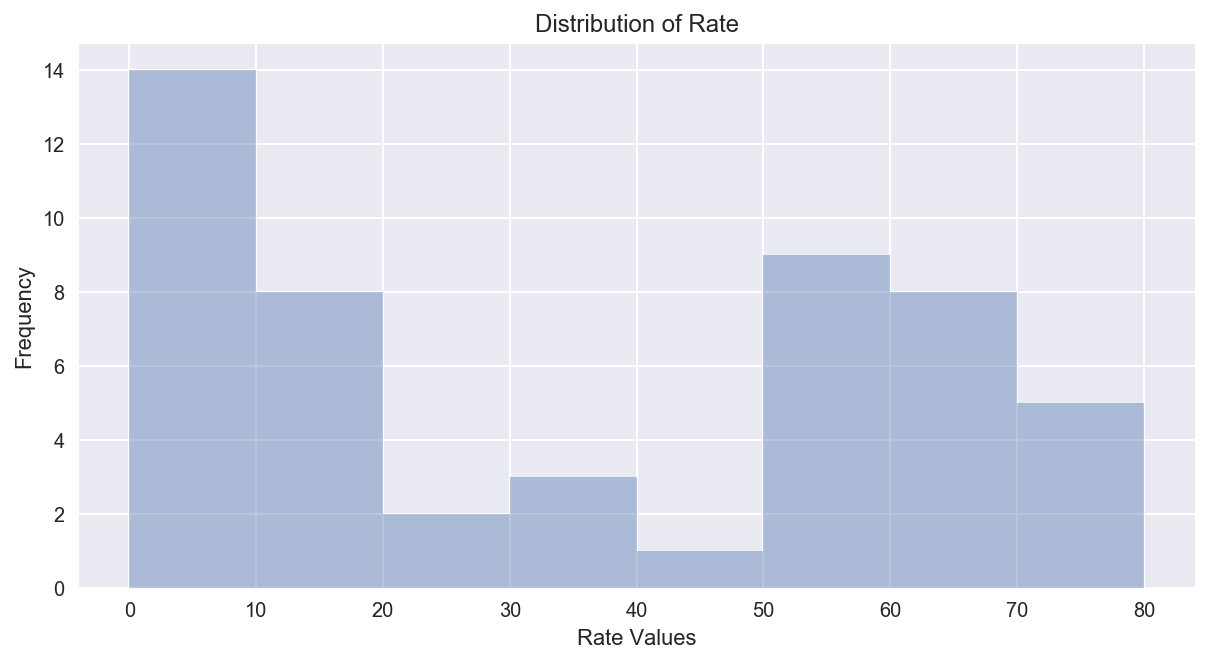

In [320]:
import seaborn as sns
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax=sns.distplot(scores2['Rate'], kde=False, bins=range(0,90,10))
ax.set_title('Distribution of Rate')
ax.set_xticks=(range(0,90,10))
ax.set_ylabel('Frequency')
ax.set_xlabel('Rate Values')
plt.show()

In [321]:
#To find out the range for math
print(scores2['Math'].min(),',',scores2['Math'].max())

439 , 603


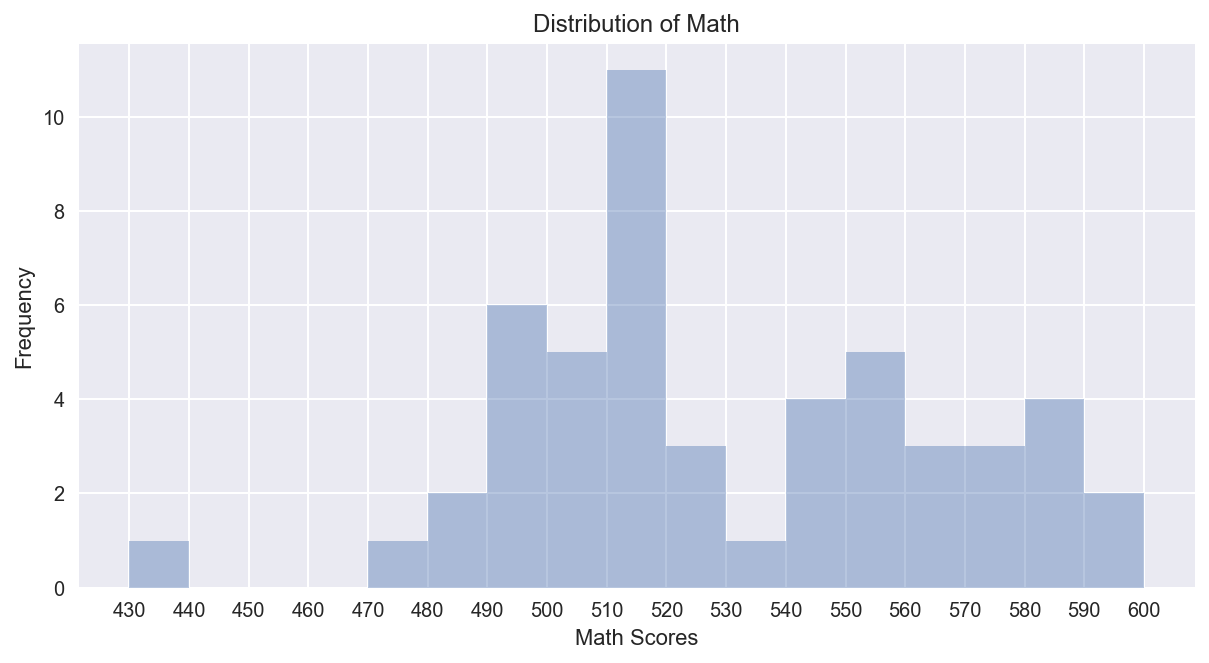

In [322]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax = sns.distplot(scores2['Math'], kde=False, bins=range(430,610,10))
ax.set_title('Distribution of Math')
ax.set_xticks(range(430,610,10))
ax.set_ylabel('Frequency')
ax.set_xlabel('Math Scores')
plt.show()

In [323]:
#To find out the range for verbal
print(scores2['Verbal'].min(),',',scores2['Verbal'].max())

482 , 593


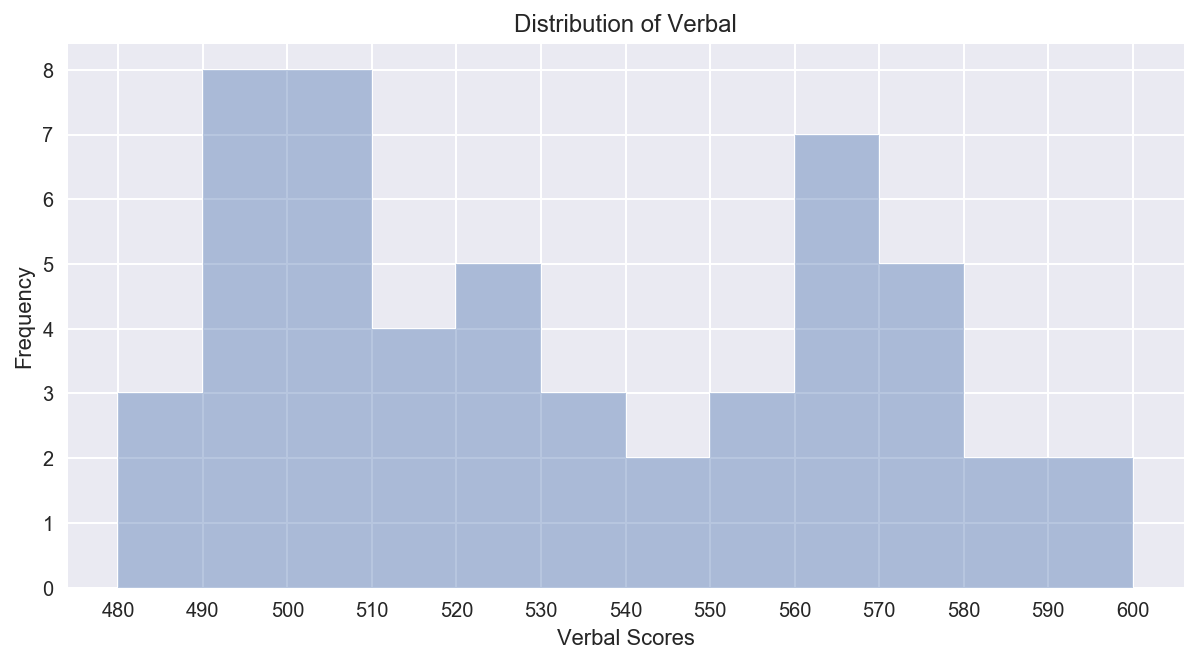

In [324]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax = sns.distplot(scores2['Verbal'], kde=False, bins=range(480,610,10))
ax.set_title('Distribution of Verbal')
ax.set_xticks(range(480,610,10))
ax.set_ylabel('Frequency')
ax.set_xlabel('Verbal Scores')
plt.show()

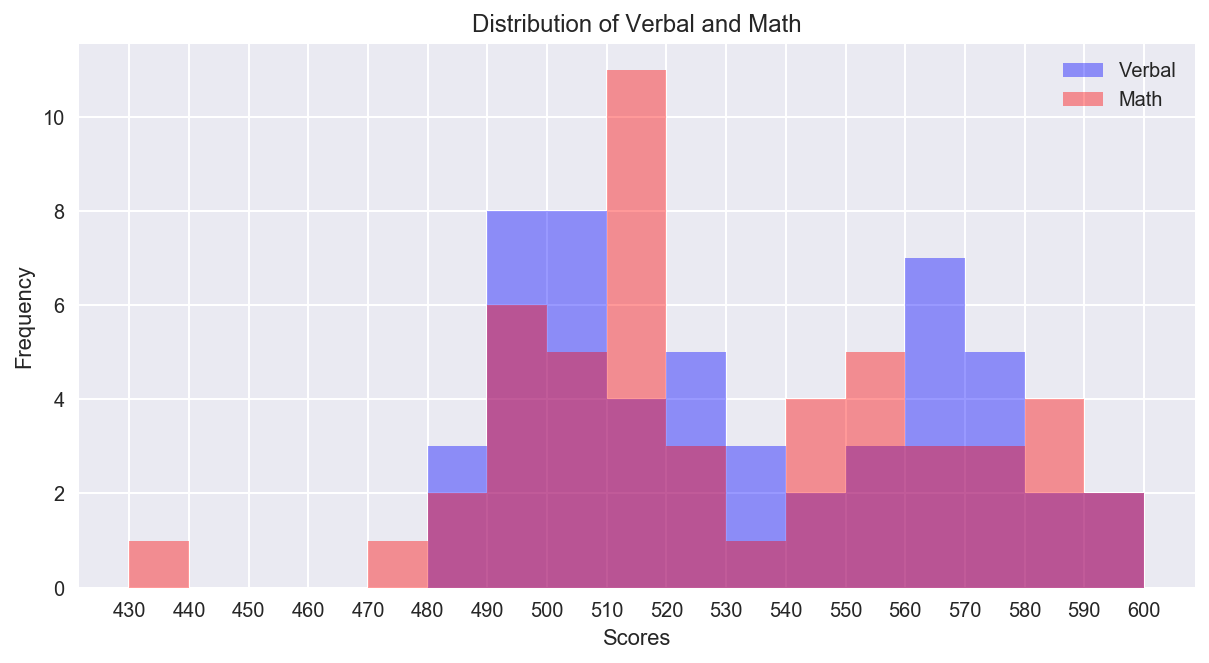

In [325]:
#To try to plot overlap chart
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax = sns.distplot(scores2['Verbal'],kde=False, bins=range(430,610,10), color ="blue" ,label="Verbal")
ax = sns.distplot(scores2['Math'],kde=False, bins=range(430,610,10), color= "red", label = 'Math')
ax.set_title('Distribution of Verbal and Math')
ax.set_xticks(range(430,610,10))
ax.set_ylabel('Frequency')
ax.set_xlabel('Scores')
plt.legend()
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

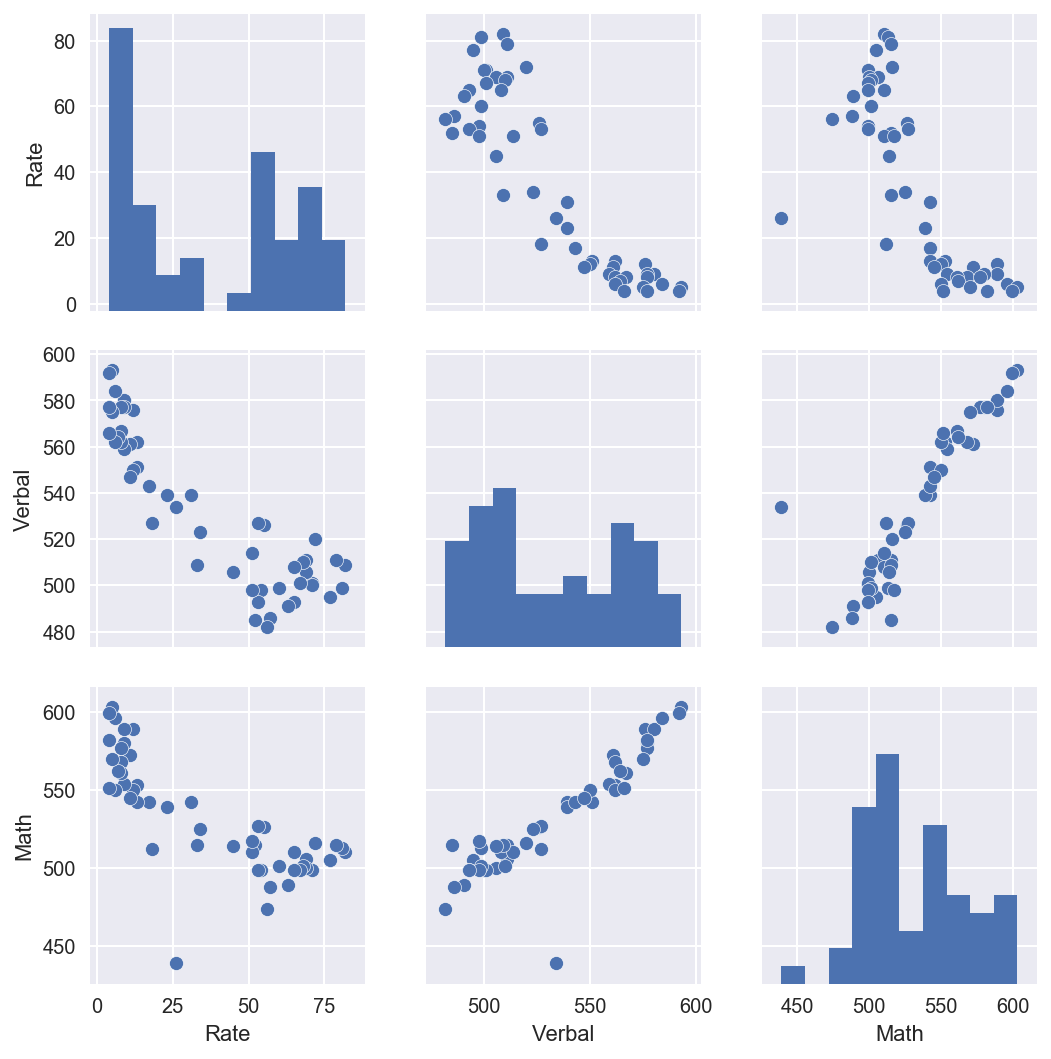

In [326]:
sns.pairplot(scores2)

Answer: It shows that maths is positively correlated to verbal, whereas verbal and math is negatively correlated to Rate.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [327]:
scores2.Verbal.unique()

array([509, 499, 511, 495, 520, 501, 500, 506, 510, 508, 493, 491, 486,
       482, 526, 498, 527, 485, 514, 523, 539, 534, 543, 562, 551, 576,
       550, 547, 561, 580, 577, 559, 567, 564, 584, 575, 593, 592, 566], dtype=int64)

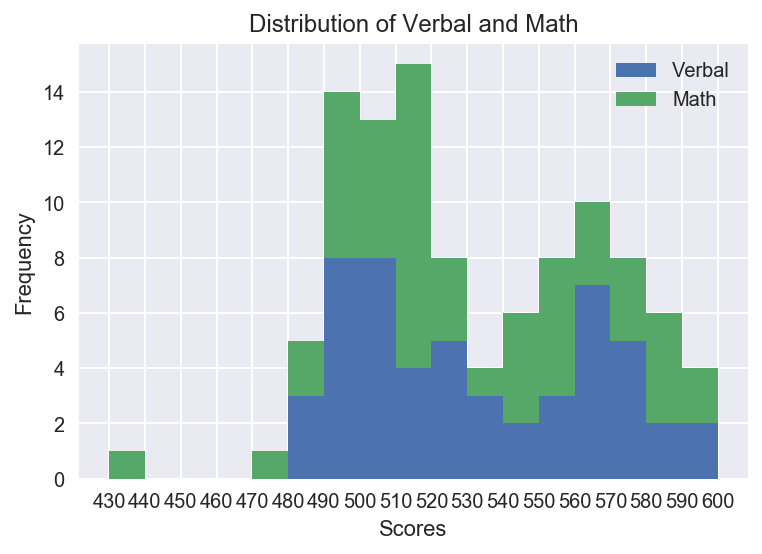

In [328]:
ax = scores2[['Verbal','Math']].plot.hist(stacked=True, bins=range(430,610,10))
ax.set_title('Distribution of Verbal and Math')
ax.set_ylabel('Frequency')
ax.set_xlabel('Scores')
ax.set_xticks(range(430,610,10))
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

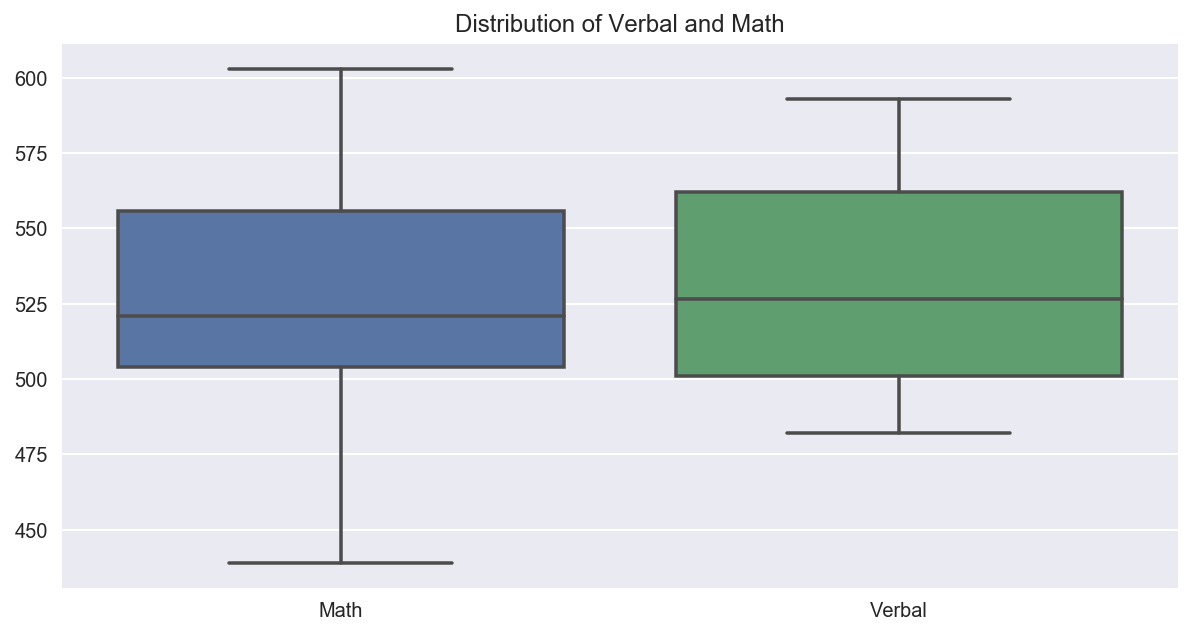

In [329]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax=sns.boxplot(data=scores2[['Math','Verbal']])
ax.set_title('Distribution of Verbal and Math')
plt.show()

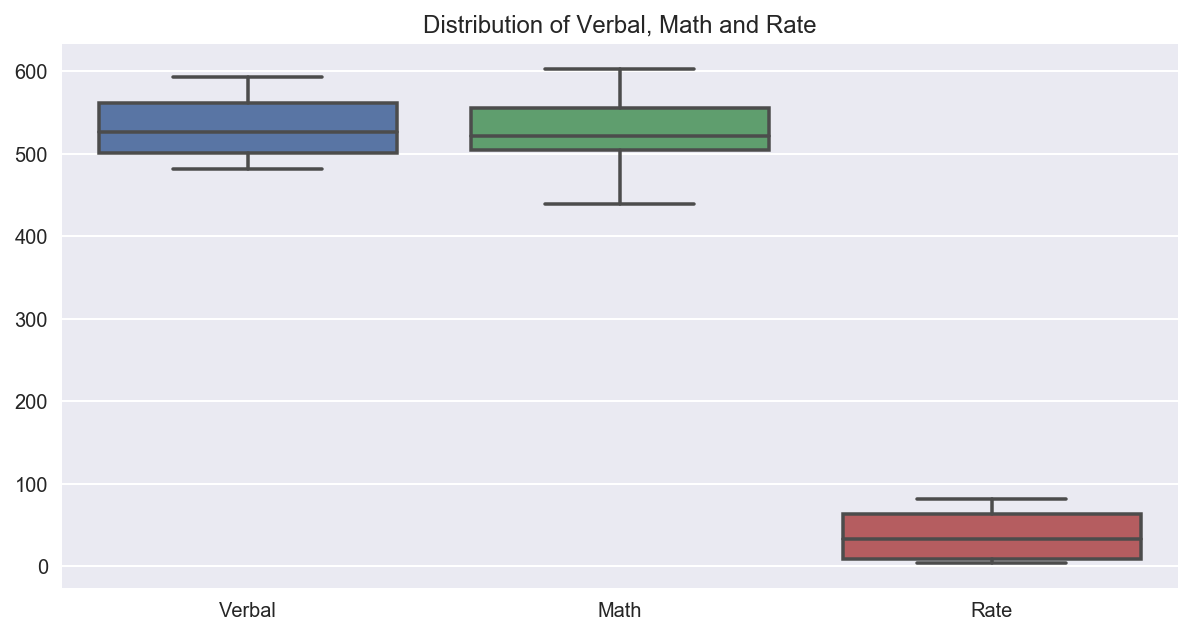

In [330]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax=sns.boxplot(data=scores2[['Verbal','Math','Rate']])
ax.set_title('Distribution of Verbal, Math and Rate')
plt.show()

Answer:
<br>
What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
<br>
Boxplot allows you to compare distribution across various variables as the mean, 25 percentile and 75 percentile are already highlighted on the chart as compared to a scatterplot or a histogram. 
<br><br>
What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?
<br>
There is a wide difference in the y values between Rate and the Maths and Verbal. This makes it hard for us to compare their distribution on a different scale. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


C:\Users\ALICIA\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


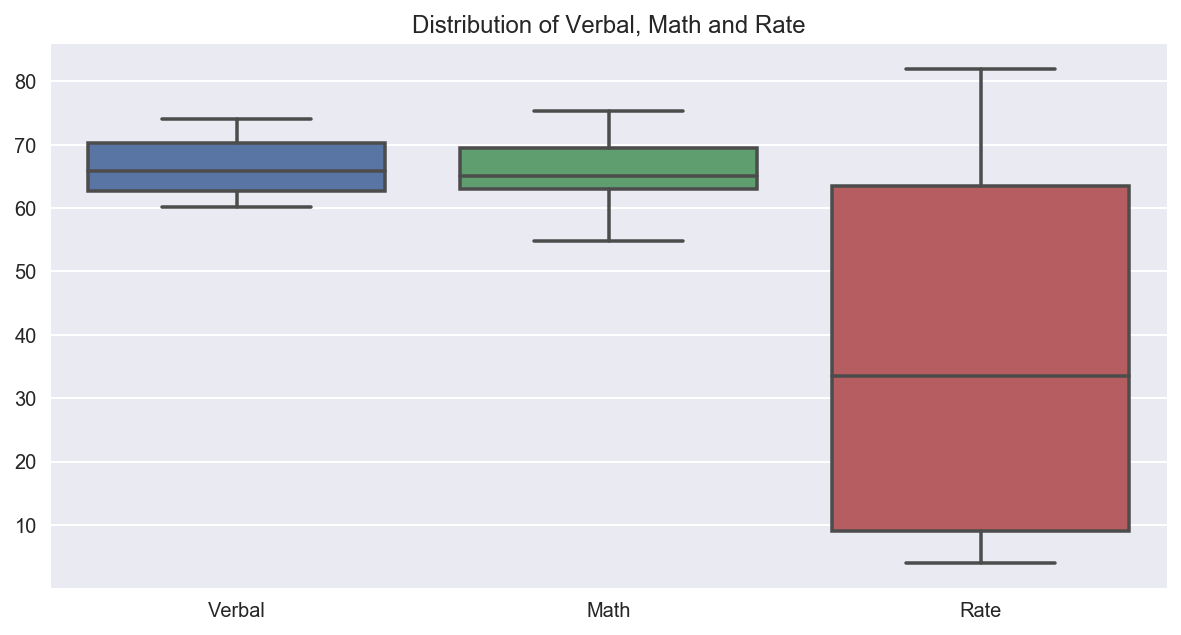

In [331]:
# As rate is in terms of percentage, we will convert the verbal and math variables to percentage as well.
# We will do so by dividing the values by 800 as 800 is the max score of each component. 
# It will be the percentage mean of the verbal score, percentage mean of the math score respectively)
data=scores2[['Verbal','Math','Rate']].copy()
data['Verbal']=data['Verbal'].apply(lambda x: x/800*100)
data['Math']=data['Math'].apply(lambda x: x/800*100)

fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax=sns.boxplot(data)
ax.set_title('Distribution of Verbal, Math and Rate')
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [332]:
scores2.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [333]:
scores2['State'].nunique()

52

In [334]:
verbalmean=scores2['Verbal'].mean()
print('The average Verbal score is', verbalmean)
scores2[scores2['Verbal']>verbalmean][['State','Verbal']].sort_values(by='Verbal')

The average Verbal score is 532.0192307692307


,State,Verbal
27,OH,534
26,CO,539
28,MT,539
30,ID,543
35,WY,547
34,KY,550
32,NM,551
39,AL,559
36,MI,561
31,TN,562


In [335]:
#How many states are above the mean?
print('there are', scores2[scores2['Verbal']>verbalmean][['State']].nunique()[0], 'states are above the mean')

there are 24 states are above the mean


What does this tell you about the distribution of Verbal scores?<br>
There are a total of 52 states, and lesser number of states are above the mean, it tells us that the distribution of verbal scores is skewed right


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [336]:
verbalmedian=scores2['Verbal'].median()
print(verbalmedian)
scores2[scores2['Verbal']>verbalmedian][['State','Verbal']].sort_values(by='Verbal')

526.5


,State,Verbal
19,WA,527
29,WV,527
27,OH,534
26,CO,539
28,MT,539
30,ID,543
35,WY,547
34,KY,550
32,NM,551
39,AL,559


How does this compare to the list of states greater than the mean of Verbal scores? Why? <br>
It is the same explanation that the mean>median and hence the distribution of verbal scores is skewed right.


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [337]:
scores2['diff']=scores2['Verbal']-scores2['Math']
scores2.head()

,State,Rate,Verbal,Math,diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [338]:
#positive values in diff would mean verbal scores are more than math score
#first dataframe should contains the 10 states with the greatest gap between verable and maths where verbal is greater than math
top10verbdiff=scores2.sort_values(by='diff', ascending=False)
top10verbdiff=top10verbdiff.head(10)
top10verbdiff.index=range(len(top10verbdiff))
top10verbdiff

,State,Rate,Verbal,Math,diff
0,OH,26,534,439,95
1,MS,4,566,551,15
2,WV,18,527,512,15
3,AR,6,562,550,12
4,NM,13,551,542,9
5,TN,13,562,553,9
6,VA,68,510,501,9
7,DC,56,482,474,8
8,ME,69,506,500,6
9,OK,8,567,561,6


In [339]:
#negative values in diff would mean maths scores are more than verbal score
#Your second DataFrame will be the inverse: states with the greatest gap between Verbal and Math such that Math is greater than Verbal. 
top10Mathdiff=scores2.sort_values(by='diff', ascending=True)
top10Mathdiff=top10Mathdiff.head(10)
top10Mathdiff.index=range(len(top10Mathdiff))
top10Mathdiff

,State,Rate,Verbal,Math,diff
0,HI,52,485,515,-30
1,CA,51,498,517,-19
2,NJ,81,499,513,-14
3,IL,12,576,589,-13
4,WI,6,584,596,-12
5,MI,11,561,572,-11
6,NY,77,495,505,-10
7,IA,5,593,603,-10
8,MN,9,580,589,-9
9,All,45,506,514,-8


In [340]:
#Print the header of both variables, only showing the top 3 states in each.
print(top10verbdiff.head(3))
print(top10Mathdiff.head(3))

  State  Rate  Verbal  Math  diff
0    OH    26     534   439    95
1    MS     4     566   551    15
2    WV    18     527   512    15
  State  Rate  Verbal  Math  diff
0    HI    52     485   515   -30
1    CA    51     498   517   -19
2    NJ    81     499   513   -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [341]:
# Since we can only do correlation on integers, we have to exclude state
scores2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
diff      52 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [342]:
#scores2 dataset exclude State columns
scores2clean=scores2.drop(['State'],axis=1)
scores2clean.head()

,Rate,Verbal,Math,diff
0,82,509,510,-1
1,81,499,513,-14
2,79,511,515,-4
3,77,495,505,-10
4,72,520,516,4


            Rate    Verbal      Math      diff
Rate    1.000000 -0.886432 -0.773746 -0.101412
Verbal -0.886432  1.000000  0.899871  0.052600
Math   -0.773746  0.899871  1.000000 -0.388219
diff   -0.101412  0.052600 -0.388219  1.000000


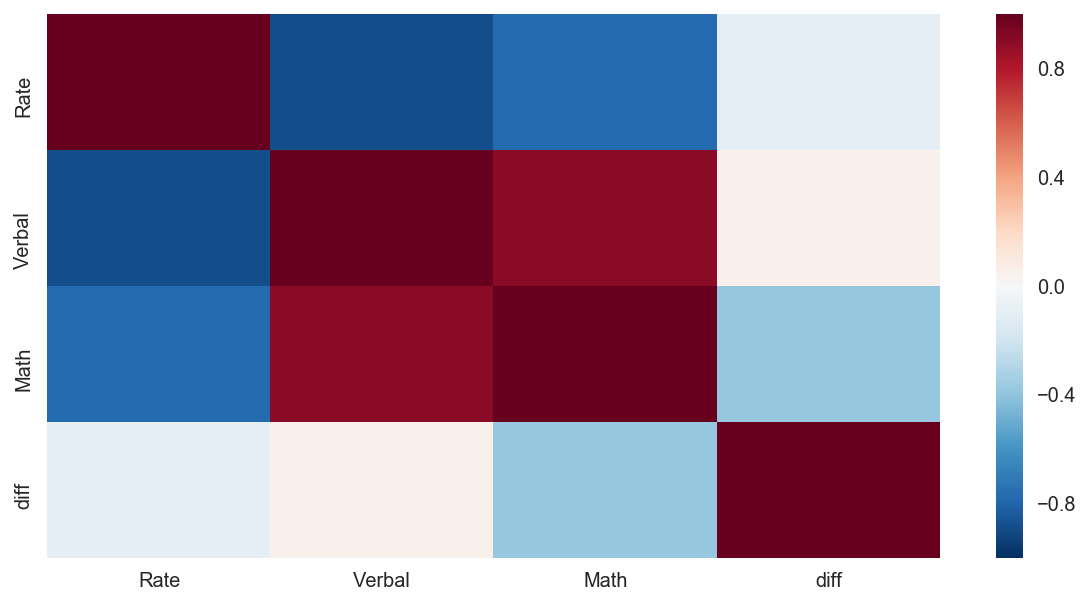

In [343]:
#Create a correlation matrix
corr = scores2clean.corr()
print(corr)
#It might be better to visualise the matrix on a heatmap
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax=sns.heatmap(corr)

What does the correlation matrix tell you?
<br>
It tells us that Verbal and Math is highly negatively correlated to Rate.
It tells us that Verbal is highly positively correlated to Math.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [344]:
scores2.describe()

,Rate,Verbal,Math,diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


What each of the rows returned by the function indicate.<br>
Count:The count of the number of rows that has no nulls values<br>
Mean: The average value of the dataset<br>
Std: The standard deviation of the dataset<br>
Min: The minimum value of the dataset<br>
25%: The 25 percentile of the dataset<br>
50%: The 50 percentile of the dataset<br>
75%: The 75 percentile of the dataset<br>
Max: The maximum value of the dataset<br>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [345]:
cov=np.cov(scores2clean)
cov

array([[  74468.66666667,   75184.        ,   75485.33333333, ...,
          93484.33333333,   85672.33333333,   77572.33333333],
       [  75184.        ,   75955.58333333,   76214.75      , ...,
          94218.        ,   86258.33333333,   78269.08333333],
       [  75485.33333333,   76214.75      ,   76517.58333333, ...,
          94781.33333333,   86854.33333333,   78641.25      ],
       ..., 
       [  93484.33333333,   94218.        ,   94781.33333333, ...,
         118831.33333333,  109213.33333333,   97915.        ],
       [  85672.33333333,   86258.33333333,   86854.33333333, ...,
         109213.33333333,  100524.66666667,   89827.33333333],
       [  77572.33333333,   78269.08333333,   78641.25      , ...,
          97915.        ,   89827.33333333,   81002.91666667]])

Describe how the covariance matrix is different from the correlation matrix.<br>
Correlation shows how two variables are related and whether they are positively or inversely related and the degree to which the variables tend to move together. However, for covariance, it will only show how two variables are related, whether positive or negative.
<br><br>
What is the process to convert the covariance into the correlation?<br>
correlation (x, y) = covariance (x, y)/ (sample standard deviation of y * sample standard deviation of x)
<br><br>
Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?<br>
It will tell us the degree which the variables tend to move toegether. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [346]:
filepath2='./drug-use-by-age.csv'
drug=pd.read_csv(filepath2)
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [347]:
#First we check the data type of each variables and by right, all variables should be float/int
drug.info()
#We will have to analyse further on these variables that are string: 
#Age, cocaine-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxycontin-frequency, meth-frequency 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

The data is not clean. Perform a check age, cocaine-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxycontin-frequency, meth-frequency which cause their data type to be string.

In [348]:
#Check age, cocaine-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxycontin-frequency, meth-frequency 
drug['age'].unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22-23',
       '24-25', '26-29', '30-34', '35-49', '50-64', '65+'], dtype=object)

In [349]:
#no of rows in the original dataset
drug['age'].count()

17

In [350]:
#remove those bin buckets and only keep those single digit rows.
#First, replace + to -, so that i can remove all rows with - using .str.contains
drug['age']=drug['age'].str.replace('+','-')

In [351]:
#The age contains single digit and bins. We will remove those bins ranges as they are not useful
drug=drug[~drug['age'].str.contains('-')]

In [352]:
drug['age']=drug['age'].apply(lambda x: int(x))

In [353]:
#remove 7 rows of data
drug['age'].count()

10

In [354]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 28 columns):
age                        10 non-null int64
n                          10 non-null int64
alcohol-use                10 non-null float64
alcohol-frequency          10 non-null float64
marijuana-use              10 non-null float64
marijuana-frequency        10 non-null float64
cocaine-use                10 non-null float64
cocaine-frequency          10 non-null object
crack-use                  10 non-null float64
crack-frequency            10 non-null object
heroin-use                 10 non-null float64
heroin-frequency           10 non-null object
hallucinogen-use           10 non-null float64
hallucinogen-frequency     10 non-null float64
inhalant-use               10 non-null float64
inhalant-frequency         10 non-null object
pain-releiver-use          10 non-null float64
pain-releiver-frequency    10 non-null float64
oxycontin-use              10 non-null float64
oxycontin-fre

In [355]:
#clean up the remaining variables
#check what causes the variable to be string. It is due to '-'
drug['crack-frequency'].unique()

array(['-', '3.0', '9.5', '1.0', '21.0', '10.0', '2.0', '5.0', '17.0'], dtype=object)

In [356]:
#check what constitute to '-' to determine what value to be replaced it with. 
#It is cause by 0 ppl in that group who use that drug and hence we will replace - with 0.
drug[drug['crack-frequency']=='-']

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5


In [357]:
#The other columns contains '-' which made the variable string instead of a float
#clean the data to replace '-' to 0/NUll
to_clean=["cocaine-frequency", "crack-frequency", "heroin-frequency", "inhalant-frequency", "oxycontin-frequency", "meth-frequency"]
for i in to_clean:
    drug[i]=drug[i].apply(lambda x: float(x.replace('-', '0')))

#drug[''] = np.where(drug['']=='-', np.NaN, drug[''])

In [358]:
#Have cleans up the relevant data columns to be the correct type
drug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 28 columns):
age                        10 non-null int64
n                          10 non-null int64
alcohol-use                10 non-null float64
alcohol-frequency          10 non-null float64
marijuana-use              10 non-null float64
marijuana-frequency        10 non-null float64
cocaine-use                10 non-null float64
cocaine-frequency          10 non-null float64
crack-use                  10 non-null float64
crack-frequency            10 non-null float64
heroin-use                 10 non-null float64
heroin-frequency           10 non-null float64
hallucinogen-use           10 non-null float64
hallucinogen-frequency     10 non-null float64
inhalant-use               10 non-null float64
inhalant-frequency         10 non-null float64
pain-releiver-use          10 non-null float64
pain-releiver-frequency    10 non-null float64
oxycontin-use              10 non-null float64
oxycontin

In [359]:
#Are there variables missing?
drug.isnull().sum()
#No missing values

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

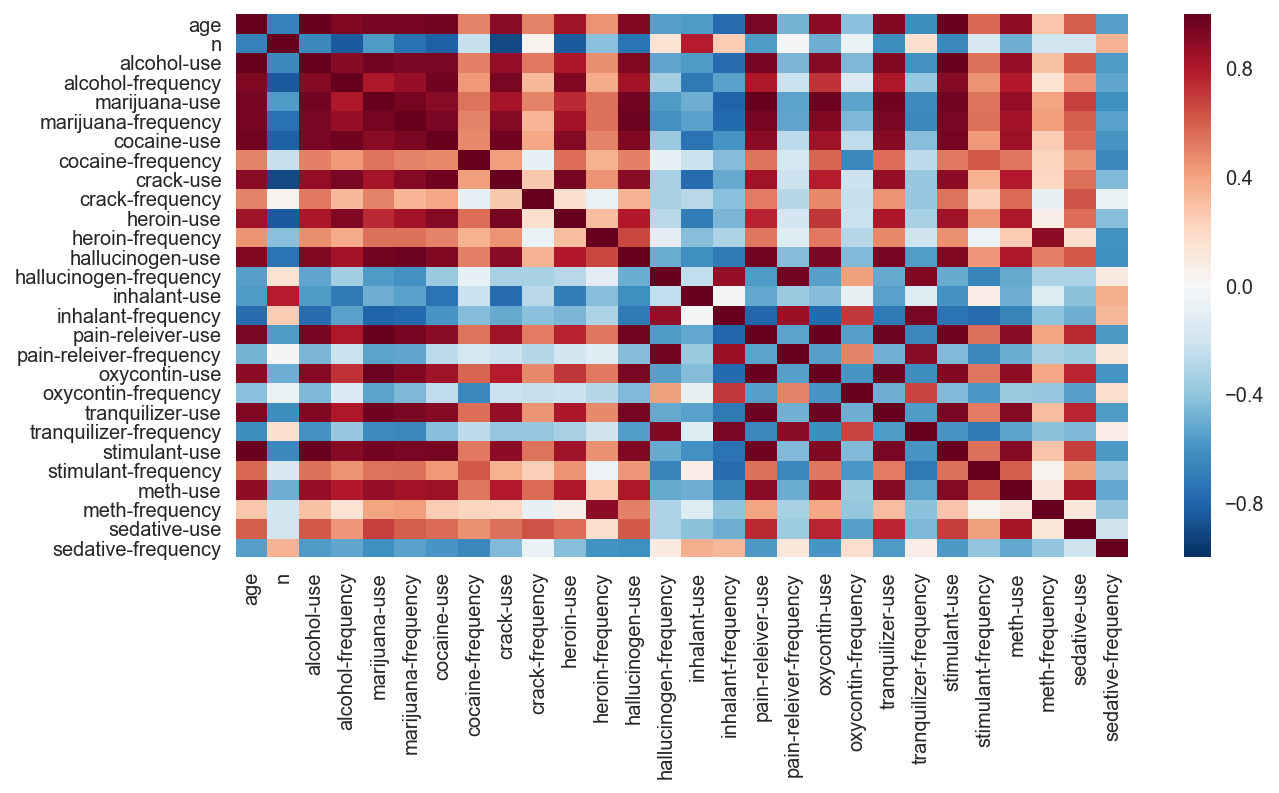

In [360]:
plt.figure(figsize=(10,5))
ax = fig.gca()
ax=sns.heatmap(drug.corr())

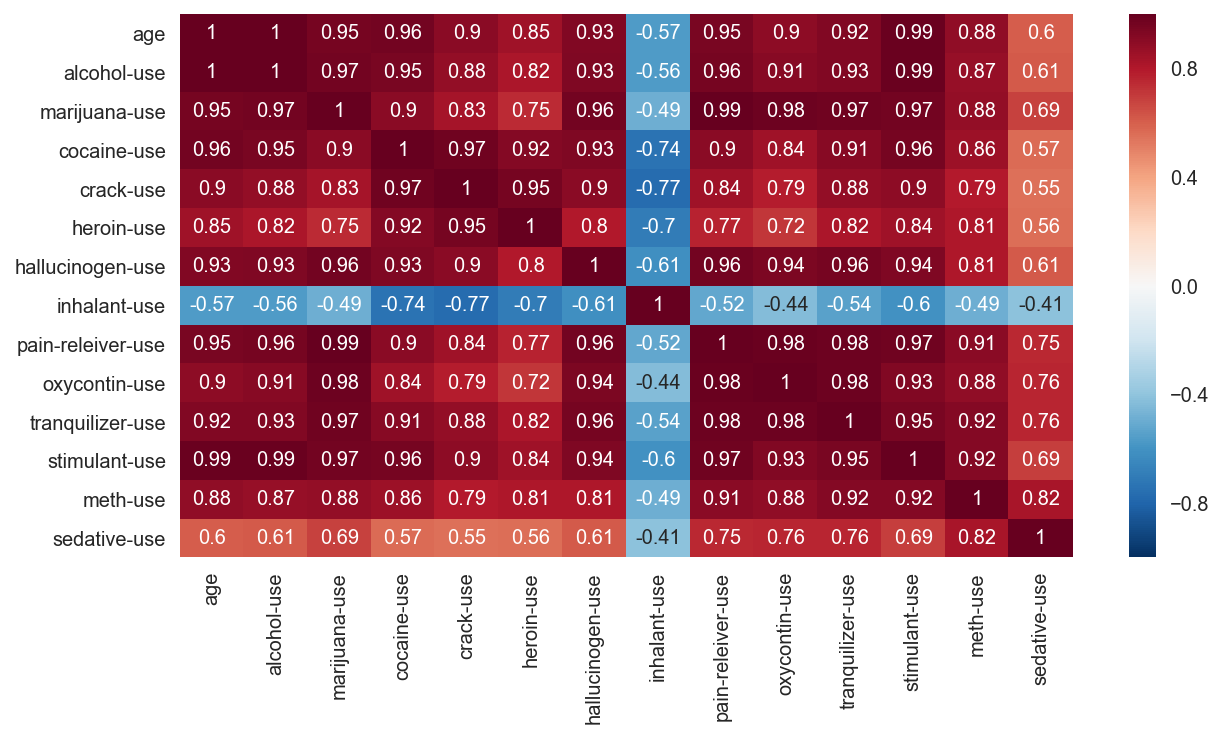

In [361]:
#Look for relationships between variables and subsets of those variables' values
#We can see a strong positive correlation for all the various drug use.
#We will filter all the drug use variables and plot the correlation chart again.
drug_use=drug[[
'age', 'alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 
'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']]

plt.figure(figsize=(10,5))
ax = fig.gca()
ax = sns.heatmap(drug_use.corr(), annot=True)

We can see that all the drug use are posively correlated to each other except for inhalant-use.
Inhalant- use is negatively correlated to the rest of all the drug use. 

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


I want to test if the median number of times a user used alcohol is different from the median number of times a user used marijuana 
<br>
H0: The median number of times are the same <br>
H1: The median number of times are different <br>
<br>
For this analysis, the significance level is 0.05. We will conduct T test. <br>

In [362]:
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [363]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [444]:
stats.ttest_ind(drug['alcohol-frequency'], drug['marijuana-frequency'])

Ttest_indResult(statistic=-1.815008199662745, pvalue=0.086222663489888718)

**Report**
As the pvalue is 0.08622, which is more than 0.05, we cannot reject the null hypothesis.
Therefore, the median number of times a user used alcohol is the same as the median number of times a user used marijuana 



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [445]:
#Pull out the rate variable from the sat dataset.
scores2[['Rate']].head()

,Rate
0,82
1,81
2,79
3,77
4,72


C:\Users\ALICIA\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


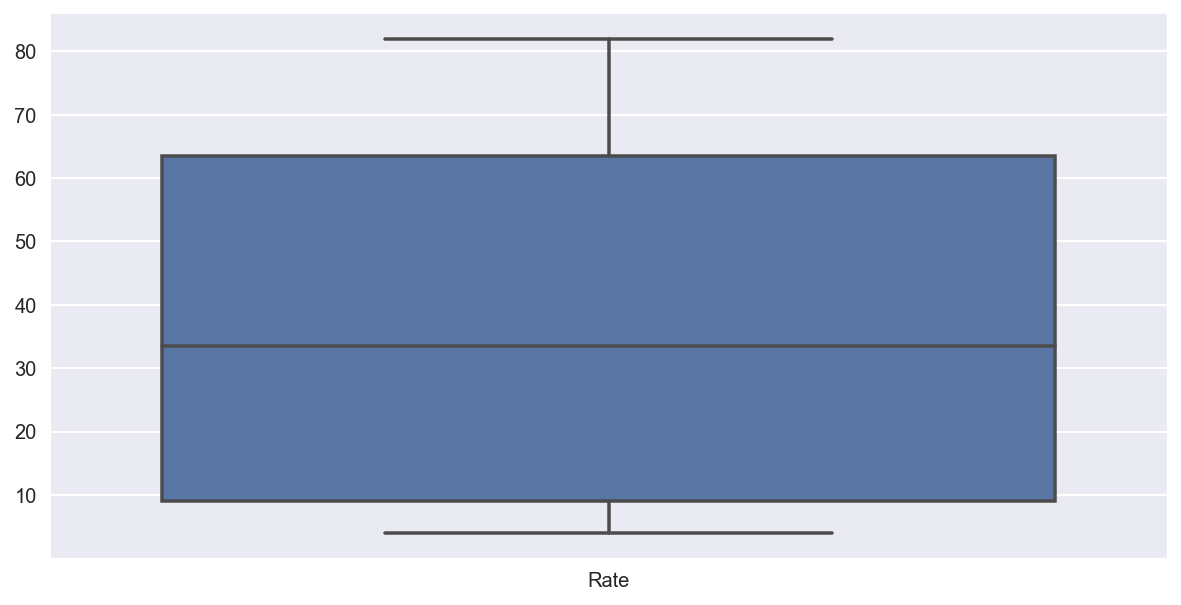

In [446]:
#Are there outliers in the dataset? Define, in words, how you numerically define outliers.
#Plot a boxplot to find visually see if there are outliers in the Rate dataset.

fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax=sns.boxplot(scores2[['Rate']])
plt.show()

My definition of outlier is any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile.

In [447]:
#To calculate the first quartile and third quartile
firstquantile= np.percentile(scores2[['Rate']], 25)  # Q1
thirdquantile=np.percentile(scores2[['Rate']], 75) #Q3
IQR= thirdquantile - firstquantile
MIN=firstquantile-1.5*(IQR)
MAX=thirdquantile+(1.5*IQR)
print(MIN,', ',MAX)

-72.75 ,  145.25


Using this method for identifying any outlier for any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile, The data has no outlier. 

I will use another definition. Outliers would be 1.5 standard deviations away from the mean

In [448]:
ratemean = np.mean(scores2['Rate'])
ratestd = np.std(scores2['Rate'])

In [449]:
print((scores2[['Rate']]>= ratemean + ratestd*1.5 ).sum())
print((scores2[['Rate']]<= ratemean - ratestd*1.5 ).sum())

Rate    3
dtype: int64
Rate    0
dtype: int64


Yes. There are 3 outliers in the dataset.

In [450]:
#Print out the outliers in the dataset.
scores2[scores2['Rate']>=ratemean + ratestd*1.5]

,State,Rate,Verbal,Math,diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4


In [451]:
#Remove the outliers from the dataset.
scores2_clean=scores2[scores2['Rate']<ratemean + ratestd*1.5]
scores2_clean.head()

,State,Rate,Verbal,Math,diff
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5


In [452]:
#Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. 
#What is different about them and why?
#cleaned data
ratemean = np.mean(scores2['Rate'])
ratemedian = np.median(scores2['Rate'])
ratestd = np.std(scores2['Rate'])

newratemean = np.mean(scores2_clean['Rate'])
newratemedian = np.median(scores2_clean['Rate'])
newratestd = np.std(scores2_clean['Rate'])

print ("With Outliers", '\n', ratemean, ratemedian,ratestd)
print ("Without Outliers", '\n', newratemean, newratemedian,newratestd)

With Outliers 
 37.15384615384615 33.5 27.03799649452359
Without Outliers 
 34.48979591836735 31.0 25.54797204219064


What is different about them and why?
After cleaning the data, the median and mean are lower because the outliers which consists the extreme values are removed and the standard deviation would be smaller.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


The Pearson correlation evaluates the linear relationship between two continuous variables, whereby a change in one variable is associated with a proportional change in the other variable.(linear) <br>
The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variable, whereby in a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. 

Spearman rank correlation:
The Spearman correlation coefficient is based on the ranked values for each variable. 
Lets have Variable A and Variable B and we would want to calculate their Spearman rank correlation. 
First, find the ranks for each variables in each row and calculate their difference between ranks, d. 
Secondly, sum up all of your d-squared values.
Insert this into the formula:<br>
Spearman rank correlation = 1 - (6*(sum up all of your d-squared values)/(n(n**2-1))

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [453]:
#Convert Rate to percentiles in the sat scores as a new column.
scores2["Rate_pecentiles"]=scores2["Rate"].apply(lambda x: stats.percentileofscore(scores2["Rate"],x))
scores2.head()

,State,Rate,Verbal,Math,diff,Rate_pecentiles
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846
3,NY,77,495,505,-10,94.230769
4,NH,72,520,516,4,92.307692


In [454]:
scores2.sort_values(by='Rate_pecentiles',ascending=False).head()

,State,Rate,Verbal,Math,diff,Rate_pecentiles
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846
3,NY,77,495,505,-10,94.230769
4,NH,72,520,516,4,92.307692


In [455]:
#Show the percentile of California in Rate.
scores2[scores2['State']=='CA']

,State,Rate,Verbal,Math,diff,Rate_pecentiles
23,CA,51,498,517,-19,56.730769


How is percentile related to the spearman rank correlation?<br>
It is linked to spearman correlation as percentiles are like the rankings for the dataset, which we needed to calculate spearman correlation.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Why might percentile scoring be useful for dealing with outliers?<br>
We might want to look at the IQR and also a factor of k which deviate from k times the IQR from the 25th percentile as well as the 75th percentile to remove the outliers.

In [456]:
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [457]:
drug['alcohol-use'].unique()

array([  3.9,   8.5,  18.1,  29.2,  40.1,  49.3,  58.7,  64.6,  69.7,  83.2])

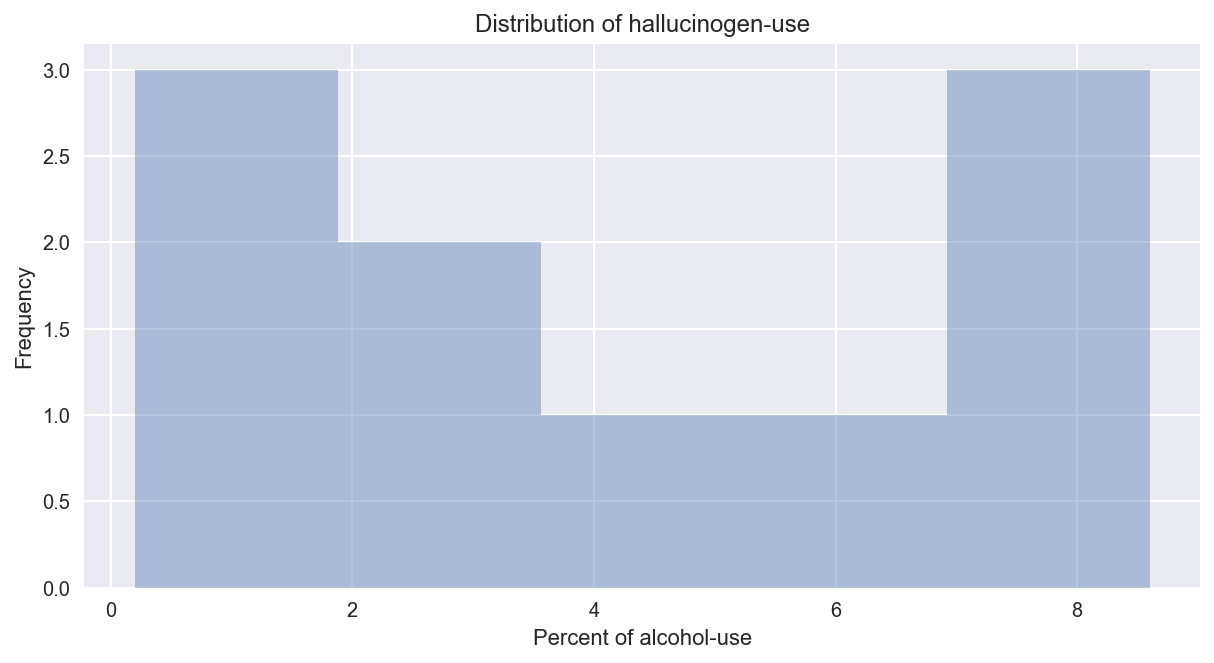

In [458]:
#Plot the distribution of a variable of your choice from the drug use dataset
#We used the hallucinogen-use variable
#Percentage of those in an age group who used hallucinogens in the past 12 months
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax = sns.distplot(drug['hallucinogen-use'], kde=False, bins=5)
ax.set_title('Distribution of hallucinogen-use')
ax.set_ylabel('Frequency')
ax.set_xlabel('Percent of alcohol-use')
plt.show()

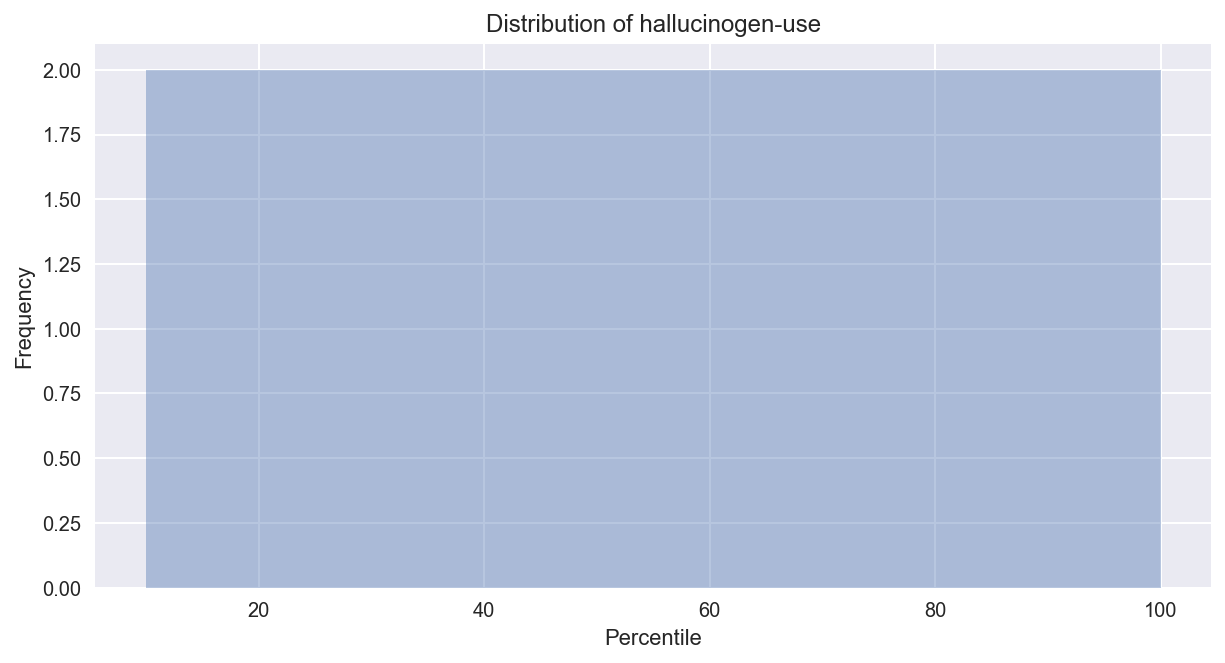

In [459]:
#Plot the same variable but percentile scored.
drug["hallucinogen_percentile"]=drug["hallucinogen-use"].apply(lambda x: stats.percentileofscore(drug["hallucinogen-use"],x))
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax = sns.distplot(drug['hallucinogen_percentile'], kde=False, bins=5)
ax.set_title('Distribution of hallucinogen-use')
ax.set_ylabel('Frequency')
ax.set_xlabel('Percentile')
plt.show()

In [460]:
drug[["hallucinogen_percentile","hallucinogen-use"]]

,hallucinogen_percentile,hallucinogen-use
0,10.0,0.2
1,20.0,0.6
2,30.0,1.6
3,40.0,2.1
4,50.0,3.4
5,60.0,4.8
6,80.0,7.0
7,100.0,8.6
8,90.0,7.4
9,70.0,6.3


Describe the effect, visually, of coverting raw scores to percentile. <br>

It will evenly distribute the points when we convert the raw scores to percentile.
However, this dataframe consist too few datapoints to see clearer. I will try to plot rate vs rate persentile in the sats dataset

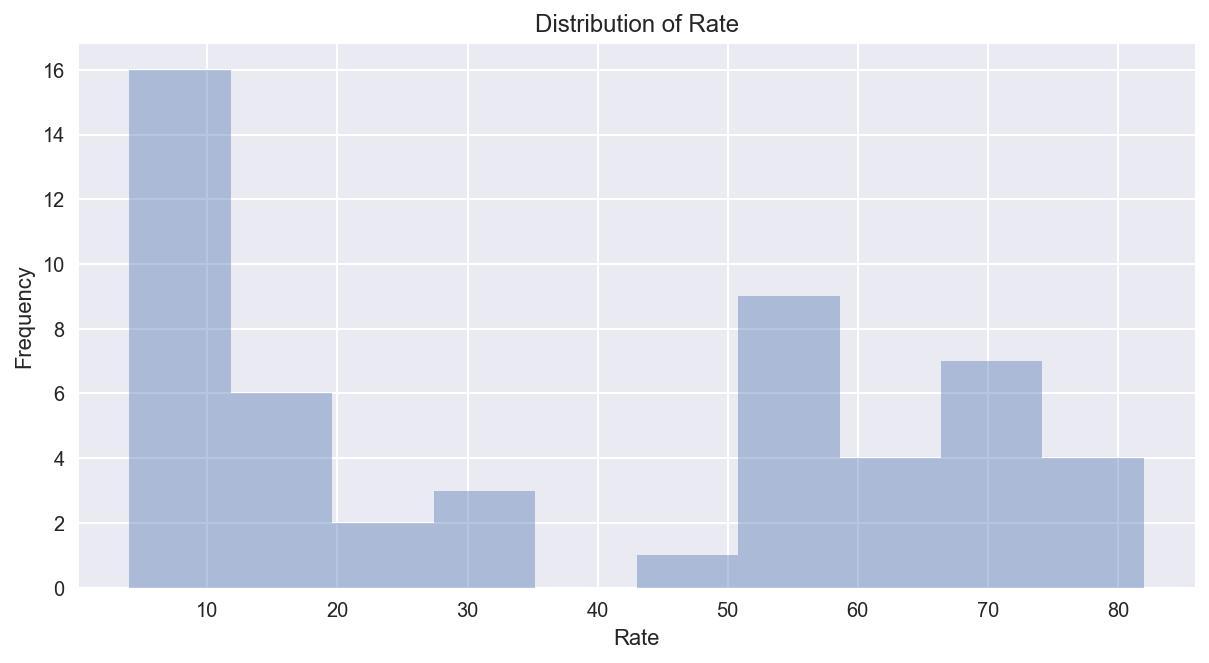

In [461]:
#we plot sats score rate VS rate percentile to see the differences clearer
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax = sns.distplot(scores2['Rate'], kde=False, bins=10)
ax.set_title('Distribution of Rate')
ax.set_ylabel('Frequency')
ax.set_xlabel('Rate')
plt.show()

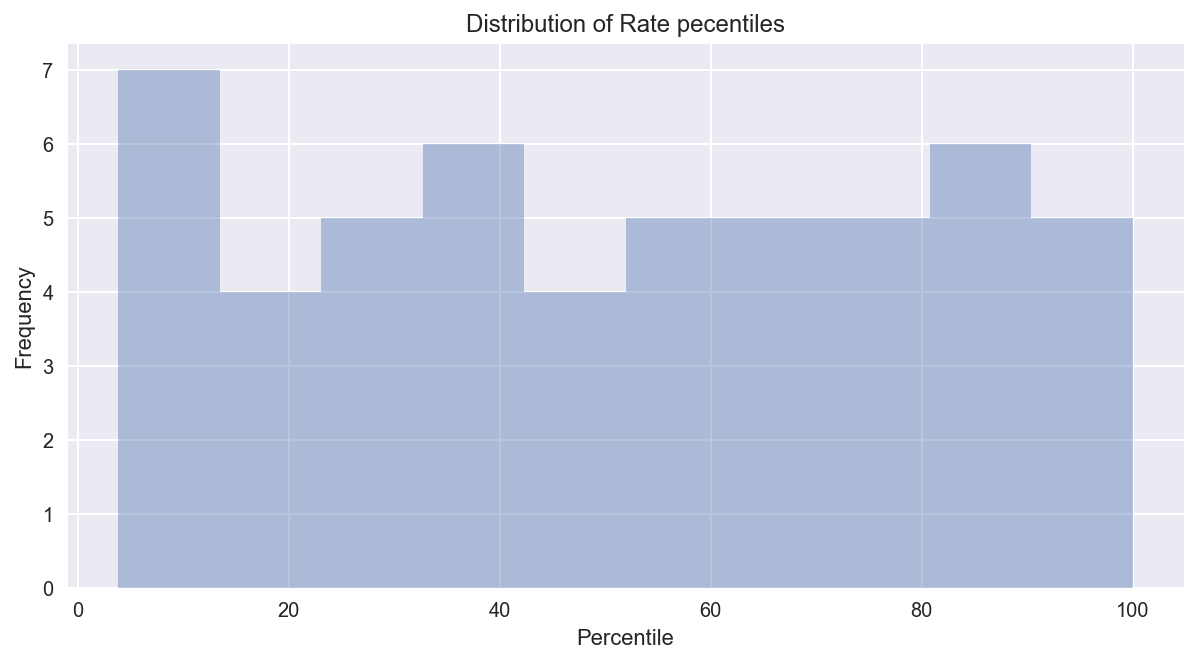

In [462]:
#Plot the Rate percentile
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax = sns.distplot(scores2['Rate_pecentiles'], kde=False, bins=10)
ax.set_title('Distribution of Rate pecentiles')
ax.set_ylabel('Frequency')
ax.set_xlabel('Percentile')
plt.show()